## Stock Prediction


In [ ]:
# Import all our required libraries
import pandas as pd # Reading in and processing the data
import matplotlib.pyplot as plt # Visualizing the data
from sklearn.model_selection import train_test_split # Split training data
from sklearn import metrics, preprocessing, cross_validation # Assess the performance of our model

# Models to experiment with
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.svm import *

# And let's see matplotlib graphs in the notebook
%matplotlib inline

In [2]:
# Define some Hyperparameters
DAYS = 20 # The number of previous days to look at when predicting the next price
STOCKCOUNT = 90 # Number of stocks to test

In [3]:
# Data has the form StockID, Opening Price, Maximum Price, Minimum Price, Closing Price, Trading Volume Present
data = pd.read_csv('train.csv')

# Extract STOCKCOUNT stocks to predict
stock1 = data.loc[:STOCKCOUNT]
stock1 = stock1.drop('StId', 1)
stock1 = pd.DataFrame(stock1.values.reshape((500*(STOCKCOUNT+1), 5)), columns=['Open', 'Max', 'Min', 'Close', 'Volume'])
stock1['Increase'] = (stock1['Close'] > stock1['Open']).astype(int)

In [4]:
data.head()
stock1.head()

,Open,Max,Min,Close,Volume,Increase
0,1.00000,1.01630,0.99640,1.00000,1260000.0,0
1,1.00000,1.00550,0.99106,1.00000,1050000.0,0
2,1.00550,1.01270,0.99640,1.00000,1420000.0,0
3,0.98919,1.00720,0.98746,1.00550,1540000.0,1
4,0.98385,0.99467,0.98025,0.98919,1390000.0,1


In [5]:
# Extract our input data and output label
stock1Data = stock1.drop('Increase', 1)

x = []
y = []
for i in range(STOCKCOUNT):
    for j in range(DAYS+500*i, 500*(i+1)):
        trainDF = stock1Data[j-DAYS:j-1]
        trainInput = trainDF.values.flatten()
        x += [trainInput]

        output = stock1['Increase'][j]
        y += [output]

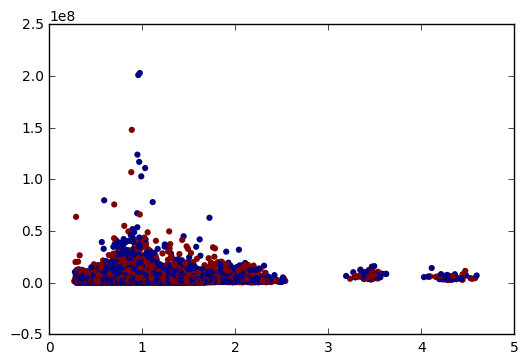

In [6]:
# Visualize the data
fix, ax = plt.subplots()
ax.scatter([g[0] for g in x], [g[4] for g in x], c=y, edgecolors='none')

In [7]:
# Split this into training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=(364))

In [12]:
# Decide what model we're using
# model = RandomForestClassifier()
# model = GaussianNB()
# model = Lasso()
# model = LogisticRegression(penalty='l1', C=300)
# model = SGDClassifier()
model = SVC(kernel='rbf')

In [13]:
model.fit(x_train, y_train)

LogisticRegression(C=300, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# Sanity check, make sure it learned its training data
expected = y_train
predicted = model.predict(x_train)
metrics.accuracy_score(expected, predicted)

0.55891975308641972

In [ ]:
def meanSquaredLoss(estimator, x, y):
    return (actual-guess)**2

scores = cross_validation.cross_val_score(model, x, y, cv=5, scoring = 'accuracy')
scores.mean()